In [4]:
from collections import Counter
import seaborn as sns

In [91]:
journals = []
year = []
organisms = []
countries = []
biomes = []
tech = []
sample_microenv = []
hotwords = []
term_ids = []

with open("clean_relevant_metadata", "r") as handle:
    for line in handle:
        line = line.strip("\n").split("\t")
        journals.append(line[1])
        year.append(line[2])
        organisms.extend(line[3].split(","))
        countries.extend(line[4].split(","))
        biomes.extend(line[5].split(","))
        tech.extend(line[6].split(","))
        sample_microenv.extend(line[7].split(","))
        hotwords.extend(line[8].split(","))
        term_ids.extend(line[9].split(","))

term_names = {}
with open("mesh_data.tab", "r") as handle:
    for line in handle:
        line = line.strip("\n").split("\t")
        term_names[line[0]] = line[1]

In [6]:
curr_list = journals
curr_list = Counter(curr_list)
curr_list = [[key, val] for key, val in curr_list.items()]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[1], reverse=True)

for item in curr_list[0:20]:
    print(f"{item[0]} - {item[1]}")

PloS one - 115
Molecular ecology resources - 51
Applied and environmental microbiology - 50
Scientific reports - 39
Molecular ecology - 28
Environmental science &amp; technology - 24
Environmental microbiology - 22
Ecology and evolution - 21
Proceedings of the National Academy of Sciences of the United States of America - 17
Methods in molecular biology (Clifton, N.J.) - 16
Applied microbiology and biotechnology - 13
Frontiers in microbiology - 13
Journal of microbiological methods - 12
FEMS microbiology letters - 11
PeerJ - 11
The Journal of eukaryotic microbiology - 9
The ISME journal - 9
FEMS microbiology ecology - 9
Protist - 9
Genome - 8


In [7]:
curr_list = year
curr_list = Counter(curr_list)
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[0], reverse=True)

for item in curr_list[0:30]:
    print(f"{item[0]} - {item[1]}")

2019 - 112
2018 - 111
2017 - 99
2016 - 99
2015 - 49
2014 - 50
2013 - 39
2012 - 40
2011 - 27
2010 - 31
2009 - 34
2008 - 25
2007 - 23
2006 - 21
2005 - 27
2004 - 17
2003 - 18
2002 - 12
2001 - 14
2000 - 6
1999 - 4
1998 - 2
1997 - 5
1995 - 3
1994 - 1
1993 - 1
1992 - 1


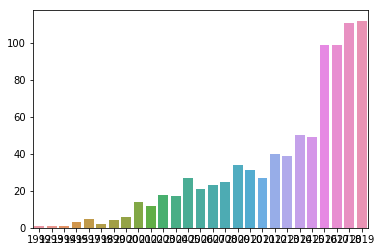

In [12]:
with open("graph_data/years", "w") as out:
    for item in curr_list:
        out.write(",".join([str(item[0]), str(item[1])]))
        out.write("\n")

vals = [item[1] for item in curr_list]
years = [item[0] for item in curr_list]
sns.barplot(x=years, y=vals)

In [53]:
curr_list = organisms

to_remove = ["collection", "metagenome", "environmental samples", "artificial", "metagenomes",
            "plasmid", "indicator", "plasmids", "synthetic", "electron", "microbiota", "unidentified",
            "vectors", "insertion", "california", "transposon", "ammonia", "environmental sequence",
            "integrons", "escherichia"]
curr_list = [x for x in curr_list if x and x not in to_remove]
#wordcloud_items = curr_list[0:50]

curr_list = Counter(curr_list)
wordcloud_items = curr_list
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[1], reverse=True)


for item in curr_list[0:20]:
    print(f"{item[0]} - {item[1]}")

bacteria - 116
escherichia coli - 42
proteobacteria - 26
archaea - 19
pseudomonas - 18
foraminifera - 18
cyanobacteria - 17
streptomyces - 16
viruses - 16
gammaproteobacteria - 12
alphaproteobacteria - 11
bacterium - 11
cercozoa - 10
cyprinus - 10
cyprinus carpio - 10
betaproteobacteria - 8
saccharomyces - 8
saccharomyces cerevisiae - 8
hypophthalmichthys - 8
bacillus - 8


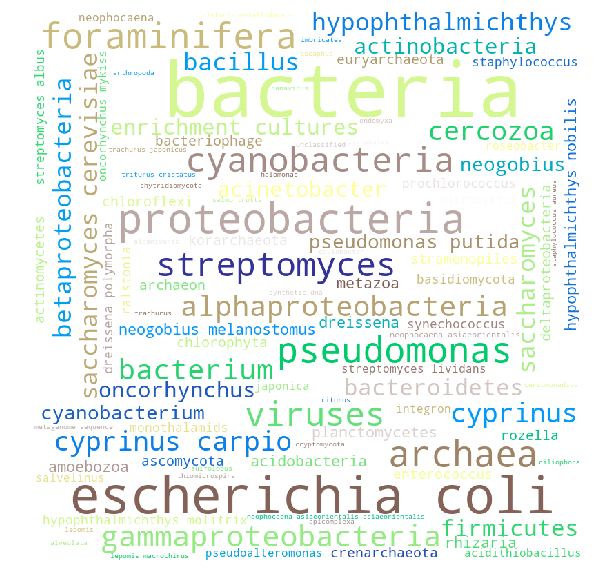

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=800, background_color="white", colormap="terrain",
                      min_font_size=10).fit_words(wordcloud_items)#.generate(",".join(wordcloud_items))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
#plt.show()
plt.savefig("word_cloud.png", dpi=600)

In [93]:
# get code here
# https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv

curr_list = countries
curr_list = Counter(curr_list)
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[1], reverse=True)

countries = [item[0].capitalize() for item in curr_list]
vals = [item[1] for item in curr_list]

for item in curr_list[0:20]:
    print(f"{item[0]} - {item[1]}")

Japan - 1
Usa - 1
Australia - 1
China - 1
Canada - 1
New zealand - 1
United states - 1
Germany - 1
Denmark - 1
Norway - 1
Switzerland - 1
Spain - 1
Uk - 1
South africa - 1
Brazil - 1
United kingdom - 1
Iceland - 1
Malaysia - 1
Taiwan - 1
Sweden - 1


In [94]:
import plotly.graph_objects as go
#import pandas as pd
#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

fig = go.Figure(data=go.Choropleth(
    locations = countries,
    z = vals,
    #text = df['COUNTRY'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP<br>Billions US$',
))
fig.show()

In [73]:
curr_list = biomes
curr_list = Counter(curr_list)
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[1], reverse=True)

for item in curr_list[0:20]:
    print(f"{item[0]} - {item[1]}")

marine - 144
freshwater - 100
tropical - 21
forest - 20
mountain - 12
estuary - 8
coral - 8
coral reef - 6
ice - 5
plankton - 4
grassland - 4
desert - 4
estuaries - 3
wetland - 3
marsh - 3
boreal - 3
floodplain - 2
intertidal - 2
rainforest - 2
woodland - 2


In [12]:
curr_list = tech
curr_list = Counter(curr_list)
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[1], reverse=True)

for item in curr_list[0:20]:
    print(f"{item[0]} - {item[1]}")

pcr - 230
metabarcoding - 127
metagenomic - 102
16s - 97
18s - 40
metagenome - 30
barcoding - 26
coi - 24


In [13]:
curr_list = sample_microenv
curr_list = Counter(curr_list)
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[1], reverse=True)

for item in curr_list[0:20]:
    print(f"{item[0]} - {item[1]}")

water - 243
marine - 144
soil - 130
freshwater - 100
sediment - 71
sand - 7
ice - 5
feces - 4
glacial - 2
saltwater - 1


In [14]:
curr_list = hotwords
curr_list = Counter(curr_list)
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[1], reverse=True)

for item in curr_list[0:20]:
    print(f"{item[0]} - {item[1]}")

fish - 140
plants - 31
mammals - 17
amphibians - 16
arthropods - 8
birds - 7
insects - 7
reptiles - 5
copepods - 3
bryophytes - 2


In [15]:
curr_list = term_ids
curr_list = Counter(curr_list)
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[1], reverse=True)

for item in curr_list[0:20]:
    print(f"{term_names[item[0]]} - {item[1]}")

Animals - 267
DNA - 237
Phylogeny - 180
Sequence Analysis, DNA - 161
Molecular Sequence Data - 160
Biodiversity - 145
Polymerase Chain Reaction - 135
Ecosystem - 134
DNA, Bacterial - 121
Environmental Monitoring - 113
Bacteria - 103
Metagenomics - 99
RNA, Ribosomal, 16S - 87
DNA Barcoding, Taxonomic - 84
Soil Microbiology - 84
Base Sequence - 75
DNA, Ribosomal - 73
DNA Primers - 71
Gene Library - 71
Geologic Sediments - 64
